In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
import math

In [3]:
import seaborn as sns

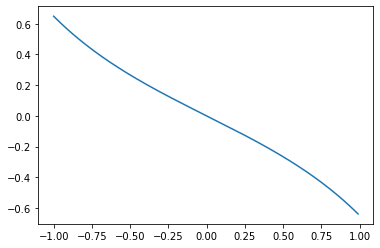

In [4]:
x = np.arange(-1,1,0.01)

def f(x):
    return (1-math.e**(0.5*x*x))/x

y = [f(x) for x in x]
sns.lineplot(x,y)

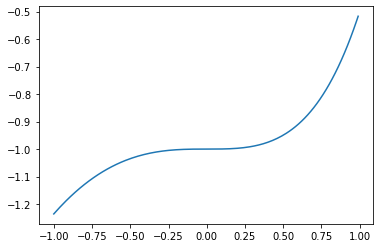

In [5]:
x = np.arange(-1,1,0.01)
a = -1
def f(x):
    return (0.5*x*x + (x*math.e**(-a*x))/a + (math.e**(-a*x))/(a*a))/a

y = [f(x) for x in x]
sns.lineplot(x,y)

In [6]:
#exponential utility function. C is input values, a>0 concave, a<0 convex 
def u(c, a):
    if a == 0:
        return c
    else:
        return (1-math.e**(-a*c))/a

In [7]:
def us(c_list,a): #utility function for the list of values
    if a == 0:
        return c_list
    else:        
        return [u(c, a) for c in c_list]
            

In [8]:
u_list = np.random.normal(0,1,1000)

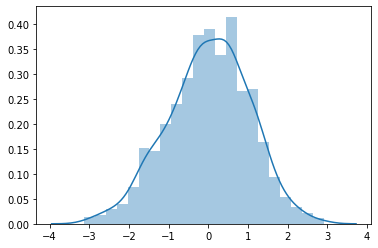

In [9]:
sns.distplot(u_list)

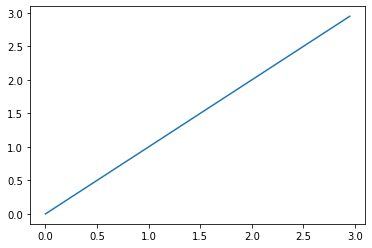

In [10]:
x = np.arange(0,3,0.05)
y = [u(c,0) for c in x]
sns.lineplot(x,y)

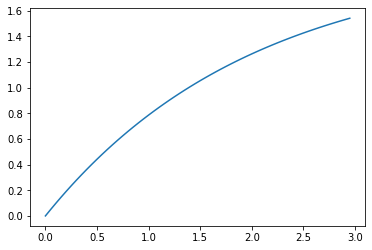

In [11]:
x = np.arange(0,3,0.05)
y = [u(c,0.5) for c in x]
sns.lineplot(x,y) #concave utility fucntion 

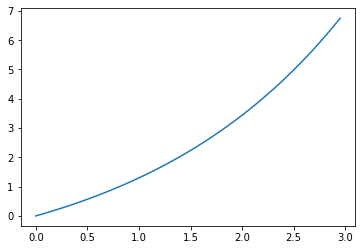

In [12]:
x = np.arange(0,3,0.05)
y = [u(c,-0.5) for c in x]
sns.lineplot(x,y) #convex utility function 

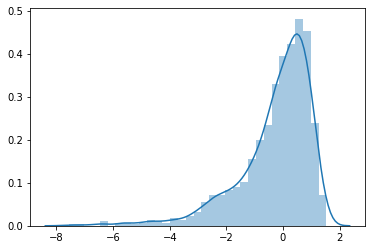

In [13]:
sns.distplot([u(c, 0.5) for c in u_list]) #utilites of concave utility function 

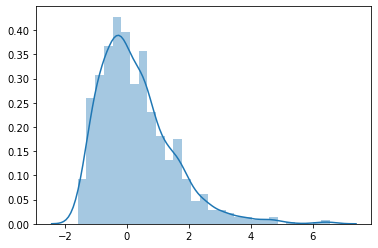

In [14]:
sns.distplot([u(c, -0.5) for c in u_list]) #utilites of concave utility function 

## Selection Bias - single attribute 

In [15]:
max_df = {}
for n in range(1, 16):
    max_list = []
    for i in range(1000):
        u_list = us(np.random.normal(0,1,n), 0)  #concave transformation
        max_list.append(max(u_list))
    max_df[n] = max_list


In [16]:
pd.DataFrame(max_df).mean(axis=0)

1     0.003922
2     0.499325
3     0.859179
4     1.034640
5     1.177935
6     1.258194
7     1.355279
8     1.431184
9     1.483038
10    1.535746
11    1.584850
12    1.644871
13    1.671881
14    1.705991
15    1.745937
dtype: float64

In [17]:
part = pd.DataFrame(max_df)[[1,2,5,10]]

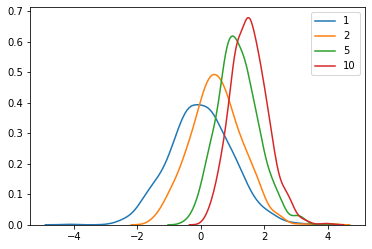

In [18]:
sns.kdeplot(part[1])
sns.kdeplot(part[2])
sns.kdeplot(part[5])
sns.kdeplot(part[10])

In [19]:
import random

In [20]:
def mean_bias_random(a=0):
    max_df = {}
    for n in range(1, 16):
        max_list = []
        for i in range(1000):
            u_list = us(np.random.normal(0,1,n), a)  #concave transformation
            max_list.append(random.choice(u_list))
        max_df[n] = max_list
    
    df = pd.DataFrame(max_df)
    print(df.mean(axis=0))
    
    sns.kdeplot(df[1])
    sns.kdeplot(df[2])
    sns.kdeplot(df[5])
    sns.kdeplot(df[10])

1    -0.038539
2    -0.031346
3     0.022513
4    -0.030491
5    -0.024642
6    -0.020867
7    -0.035793
8    -0.030024
9    -0.034001
10    0.061055
11   -0.034724
12    0.002078
13   -0.032374
14   -0.041985
15   -0.024398
dtype: float64


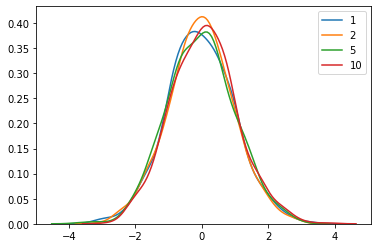

In [21]:
mean_bias_random(0)

1    -0.201512
2    -0.291521
3    -0.265707
4    -0.251926
5    -0.277071
6    -0.280576
7    -0.228179
8    -0.283635
9    -0.288693
10   -0.224504
11   -0.232046
12   -0.258908
13   -0.271114
14   -0.303851
15   -0.253702
dtype: float64


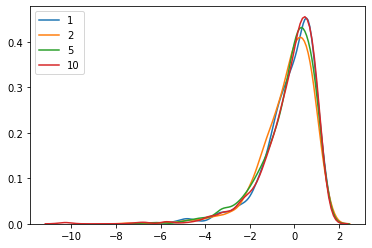

In [22]:
mean_bias_random(0.5) #concave

1     0.243213
2     0.293445
3     0.202934
4     0.318641
5     0.341632
6     0.291891
7     0.246731
8     0.263444
9     0.282624
10    0.275838
11    0.300646
12    0.208947
13    0.277065
14    0.200352
15    0.268753
dtype: float64


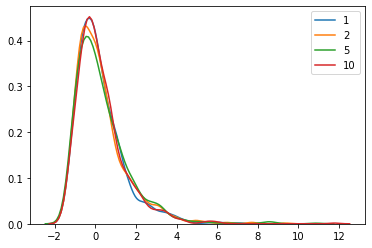

In [23]:
mean_bias_random(-0.5) #convex

In [24]:
def mean_bias(a=0):
    max_df = {}
    for n in range(1, 16):
        max_list = []
        for i in range(1000):
            u_list = us(np.random.normal(0,1,n), a)  #concave transformation
            max_list.append(max(u_list))
        max_df[n] = max_list
    
    df = pd.DataFrame(max_df)
    print(df.mean(axis=0))
    
    sns.kdeplot(df[1])
    sns.kdeplot(df[2])
    sns.kdeplot(df[5])
    sns.kdeplot(df[10])

1    -0.029678
2     0.563900
3     0.848980
4     1.080465
5     1.165839
6     1.295667
7     1.347983
8     1.404139
9     1.494366
10    1.516054
11    1.579073
12    1.650267
13    1.693509
14    1.727990
15    1.734053
dtype: float64


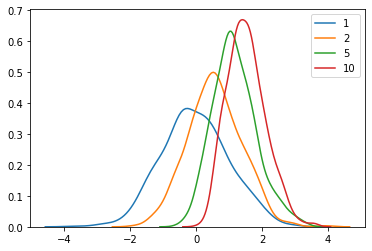

In [25]:
mean_bias()

1    -2.284625e+10
2    -9.869502e+04
3    -1.392513e+02
4    -8.181060e-01
5    -7.188697e-01
6     9.077813e-02
7     8.792443e-02
8     9.924649e-02
9     9.877513e-02
10    9.970574e-02
11    9.973778e-02
12    9.993633e-02
13    9.996309e-02
14    9.998593e-02
15    9.998854e-02
dtype: float64


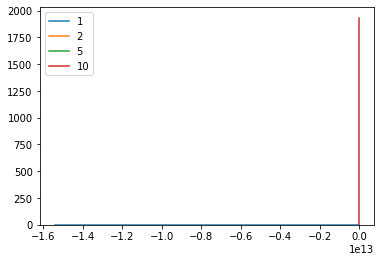

In [26]:
mean_bias(a=10) #case of concave

1     0.208375
2     0.913023
3     1.272762
4     1.626881
5     1.819859
6     1.993629
7     2.254254
8     2.296493
9     2.437347
10    2.518955
11    2.616776
12    2.711455
13    2.763594
14    2.847842
15    3.025510
dtype: float64


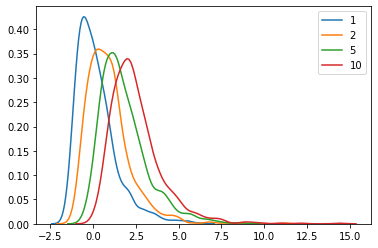

In [27]:
mean_bias(a=-0.5) #case of convex

In [32]:
def mean_bias_return(a=0):
    max_df = {}
    for n in range(1, 16):
        max_list = []
        for i in range(1000):
            u_list = us(np.random.normal(0,1,n), a)  #concave transformation
            max_list.append(max(u_list))
        max_df[n] = max_list
    
    df = pd.DataFrame(max_df)
    return(df.mean(axis=0))

In [53]:
result = {}
for a in np.arange(-10, 11, 1):
    result[a] = mean_bias_return(a)

In [54]:
pd.DataFrame(result)

,-10,-9,-8,-7,-6,-5,-4,-3,-2,-1,...,1,2,3,4,5,6,7,8,9,10
1,2.959390e+11,4.155601e+08,7.207141e+05,4.408478e+05,8.568048e+05,13725.858101,227.054818,13.392115,3.255938,0.755774,...,-0.766202,-3.144965,-27.878382,-278.641387,-23627.669528,-21788.532990,-8.475454e+06,-1.371445e+07,-8.532928e+09,-4.068176e+10
2,1.039377e+09,6.042182e+09,3.460656e+09,7.944265e+05,1.286784e+07,14528.966876,340.359915,35.812774,4.673861,1.381497,...,0.209514,-0.078915,-0.399095,-7.833704,-47.532543,-164.310331,-6.009680e+01,-9.133002e+02,-1.397712e+03,-5.690712e+04
3,4.565814e+10,6.871473e+12,5.735275e+08,4.110055e+05,4.875649e+05,7597.786556,821.176730,65.073761,7.461539,2.012936,...,0.399192,0.269263,0.164968,0.006275,-1.773061,-2.214395,-2.745831e+00,-1.731377e+00,-1.238297e+03,-4.040782e+01
4,2.074323e+12,5.054791e+10,1.187355e+09,9.060121e+06,1.638025e+06,30827.840378,1552.724712,81.903003,10.107247,2.567773,...,0.541575,0.341058,0.223727,0.173672,-0.001818,0.001729,-3.206832e-02,-1.896779e-01,-2.214490e+00,-3.286413e+00
5,1.968847e+12,2.434544e+12,3.389452e+08,7.275925e+07,2.223426e+07,33310.448859,2293.320979,81.471164,14.587373,3.134797,...,0.606333,0.390929,0.284045,0.211271,0.137205,0.084875,8.122192e-02,4.282897e-02,-2.117496e-01,-6.664385e-01
6,8.346176e+11,6.862719e+09,4.767695e+08,7.893126e+07,1.277159e+08,95664.435244,4373.721623,173.410016,14.864183,3.556074,...,0.663844,0.415071,0.296362,0.212444,0.177550,0.127283,1.252172e-01,1.042917e-01,1.002332e-01,8.775155e-02
7,2.145166e+15,3.423938e+10,2.170993e+09,8.628755e+07,1.150290e+06,70505.915806,3501.490523,194.894677,21.292344,3.849335,...,0.692224,0.435825,0.306185,0.234787,0.189861,0.161443,1.362035e-01,1.209403e-01,1.058801e-01,8.846077e-02
8,6.942904e+12,6.332670e+11,1.132046e+10,1.016157e+08,1.404421e+07,48136.019308,3765.424989,204.688573,17.853644,4.265314,...,0.709781,0.441922,0.314761,0.242485,0.193352,0.163239,1.379088e-01,1.227886e-01,1.098611e-01,9.870392e-02
9,2.418052e+11,1.272225e+11,1.738185e+09,1.416979e+08,8.620681e+06,48878.769526,3726.482540,153.297283,21.961214,4.316632,...,0.737659,0.452385,0.319406,0.241041,0.196015,0.164901,1.418700e-01,1.169663e-01,1.104611e-01,9.652823e-02
10,1.546898e+12,6.145515e+11,2.864827e+10,5.829021e+07,1.667168e+06,63655.879595,2734.809980,232.000068,22.779154,4.679299,...,0.751118,0.456484,0.321583,0.245315,0.197578,0.164674,1.417545e-01,1.247130e-01,1.108346e-01,9.748333e-02


In [28]:
def bias_per_alternatives(n=2):
    a_u = {}
    for a in [-0.5, 0, 0.5]:
        max_list = []
        for i in range(1000):
            
            u_list = us(np.random.normal(0,1,n), a)
            max_list.append(max(u_list))
            
        a_u[a] = max_list
        
    df = pd.DataFrame(a_u)
    
    
    sns.kdeplot(a_u[-0.5], label='convex')
    sns.kdeplot(a_u[0], label='linear')
    sns.kdeplot(a_u[0.5], label='concave')
    
    plt.legend()
    plt.show()

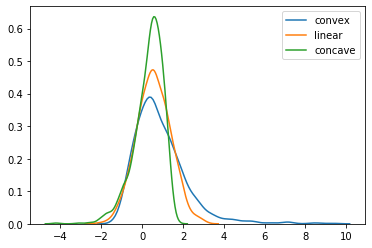

In [29]:
bias_per_alternatives()

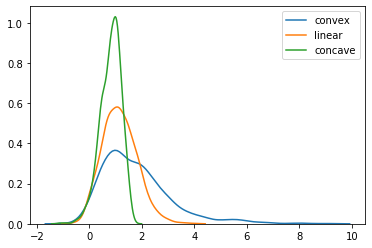

In [30]:
bias_per_alternatives(n=5)

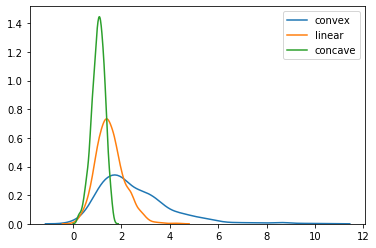

In [31]:
bias_per_alternatives(n=10)

## Selection Bias - multi attribute 

In [20]:
def mu_list(n_attribute, weights, n_alternatives, a=0):
    mu_list = [] #list of multiattribute utility
    
    for i in range(n_alternatives):
        u = us(np.random.normal(0,1,n_attribute), a) #list of attribute-specific utilities
        #append the weighted sum of multiattribute utilities 
        mu_list.append(sum([x*y for x, y in zip(u, weights)])) 
        
    return mu_list #list of alternatives 

2-attribute, linear utility function 

In [21]:
x = np.array([1,2,3])
y = np.array([0.5, 0.5, 0.5])

[(x,y) for x,y in zip(x,y)]

[(1, 0.5), (2, 0.5), (3, 0.5)]

1    -0.009720
2     0.341860
3     0.611625
4     0.768437
5     0.808768
6     0.888130
7     0.946447
8     1.001033
9     1.037232
10    1.082004
11    1.112612
12    1.133470
13    1.177469
14    1.193115
15    1.224551
dtype: float64


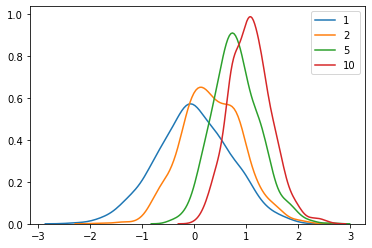

In [22]:
max_df = {}
for n in range(1,16):
    max_list = []
    for i in range(1000): #simulate 1000 times
        max_list.append(max(mu_list(2, np.array([0.5, 0.5]), n)))
    max_df[n] = max_list
    
    
df = pd.DataFrame(max_df)
print(df.mean(axis=0))

sns.kdeplot(df[1])
sns.kdeplot(df[2])
sns.kdeplot(df[5])
sns.kdeplot(df[10])

In [23]:
def mu_mean_bias(n_attributes, weights, a):
    
    max_df = {}
    for n in range(1,16):
        max_list = []
        for i in range(1000): #simulate 1000 times
            max_list.append(max(mu_list(n_attributes, weights, n, a)))
        max_df[n] = max_list


    df = pd.DataFrame(max_df)
    print(df.mean(axis=0))

    sns.kdeplot(df[1])
    sns.kdeplot(df[2])
    sns.kdeplot(df[5])
    sns.kdeplot(df[10])

1     0.002501
2     0.393991
3     0.598260
4     0.739466
5     0.812578
6     0.910672
7     0.953961
8     1.006790
9     1.050033
10    1.089759
11    1.119157
12    1.152867
13    1.179027
14    1.199008
15    1.216559
dtype: float64


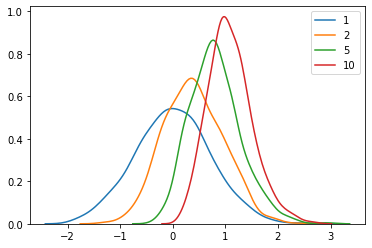

In [24]:
mu_mean_bias(2, np.array([0.5, 0.5]), 0)

1    -0.023418
2     0.320423
3     0.499116
4     0.585872
5     0.672125
6     0.744954
7     0.793194
8     0.821202
9     0.857135
10    0.890735
11    0.915138
12    0.952142
13    0.944402
14    0.997269
15    1.011410
dtype: float64


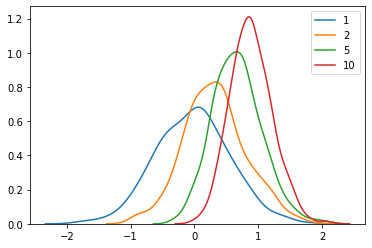

In [27]:
mu_mean_bias(3, np.array([1/3, 1/3, 1/3]), 0) #3-attribute, linear

1     0.005977
2     0.233638
3     0.382158
4     0.443468
5     0.519470
6     0.561333
7     0.598819
8     0.648077
9     0.652736
10    0.685296
11    0.705330
12    0.736181
13    0.745373
14    0.762159
15    0.772524
dtype: float64


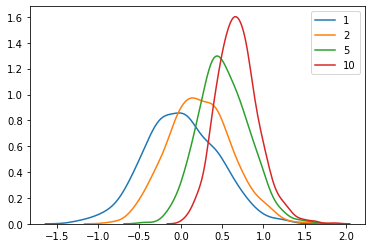

In [108]:
mu_mean_bias(5, np.array([1/5, 1/5, 1/5, 1/5, 1/5]), 0) #3-attribute, linear

1     0.017224
2     0.414522
3     0.635059
4     0.767927
5     0.851233
6     0.914550
7     1.003178
8     1.039844
9     1.089241
10    1.140437
11    1.164257
12    1.185659
13    1.218412
14    1.251535
15    1.283806
dtype: float64


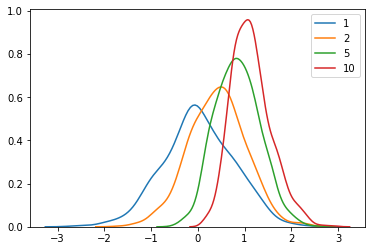

In [104]:
mu_mean_bias(3, np.array([0.2, 0.7, 0.1]), 0) #3-attribute, linear

1    -0.255625
2     0.106432
3     0.266277
4     0.374213
5     0.441897
6     0.492166
7     0.522446
8     0.551775
9     0.577815
10    0.608019
11    0.634553
12    0.640896
13    0.670609
14    0.680723
15    0.695029
dtype: float64


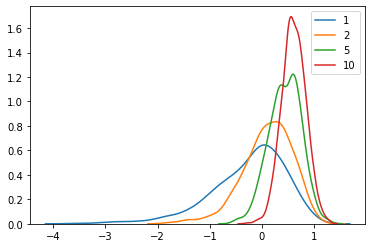

In [75]:
mu_mean_bias(3, np.array([1/3, 1/3, 1/3]), 0.5) #3-attribute, concave

1     0.240088
2     0.673478
3     0.855210
4     1.027698
5     1.138920
6     1.237822
7     1.340558
8     1.392290
9     1.409120
10    1.520157
11    1.526985
12    1.578042
13    1.632764
14    1.680374
15    1.699118
dtype: float64


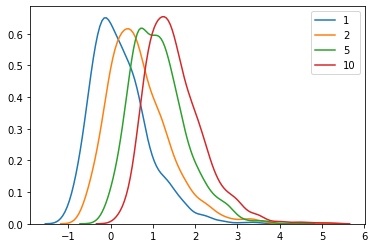

In [76]:
mu_mean_bias(3, np.array([1/3, 1/3, 1/3]), -0.5) #3-attribute, convex